In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';', quotechar='"')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# Exploratory Data Analysis

<Axes: xlabel='marital', ylabel='count'>

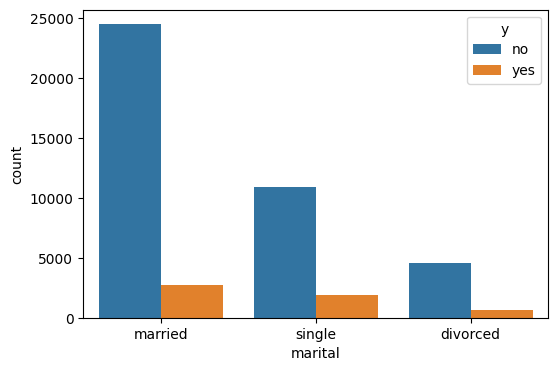

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='marital', hue='y', data=df)


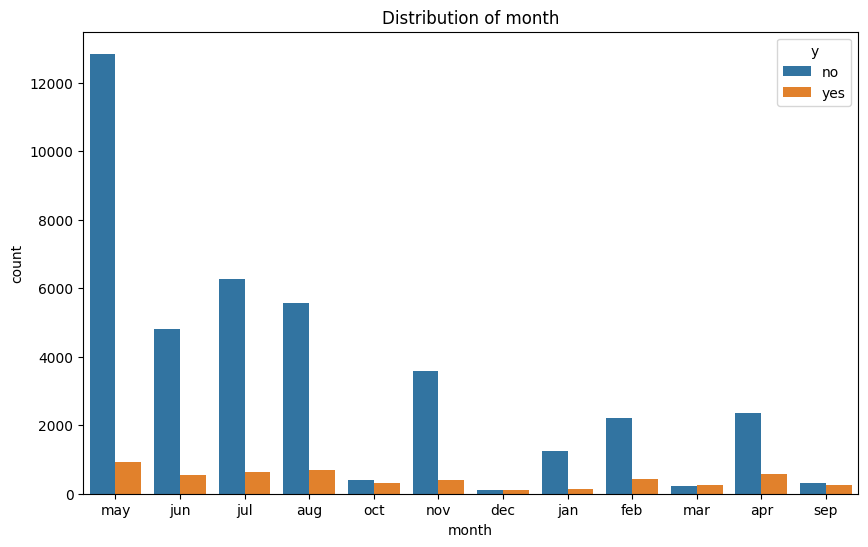

In [10]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'month', hue = 'y', data = df)

plt.title('Distribution of month')

plt.show()

<Axes: xlabel='loan', ylabel='count'>

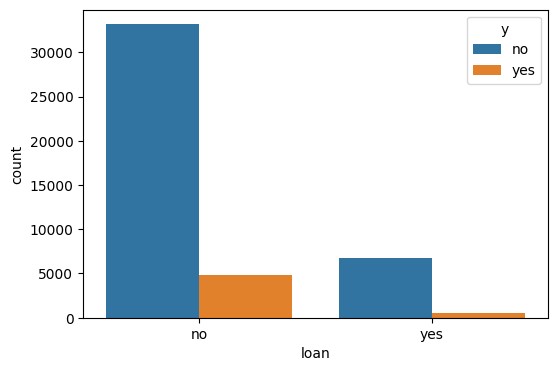

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='loan', hue = 'y', data=df)

<Axes: xlabel='loan', ylabel='count'>

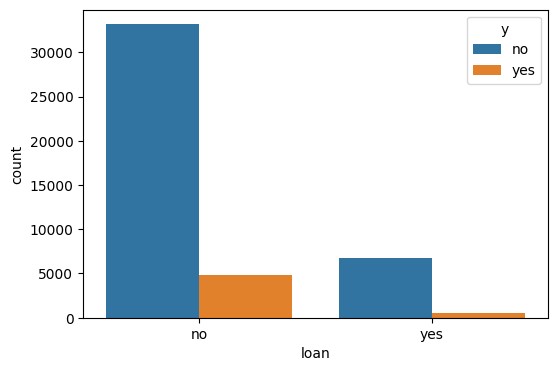

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='loan', hue = 'y', data=df)

<Axes: xlabel='housing', ylabel='count'>

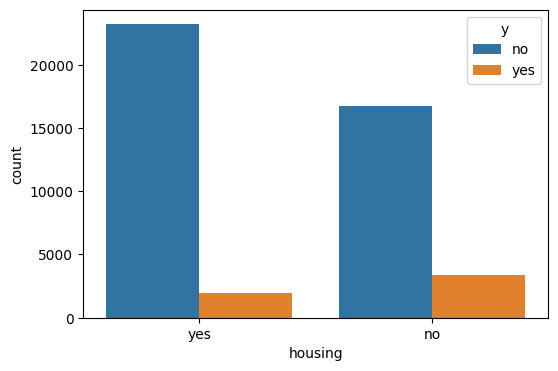

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='housing', hue = 'y', data=df)

<Axes: xlabel='job', ylabel='count'>

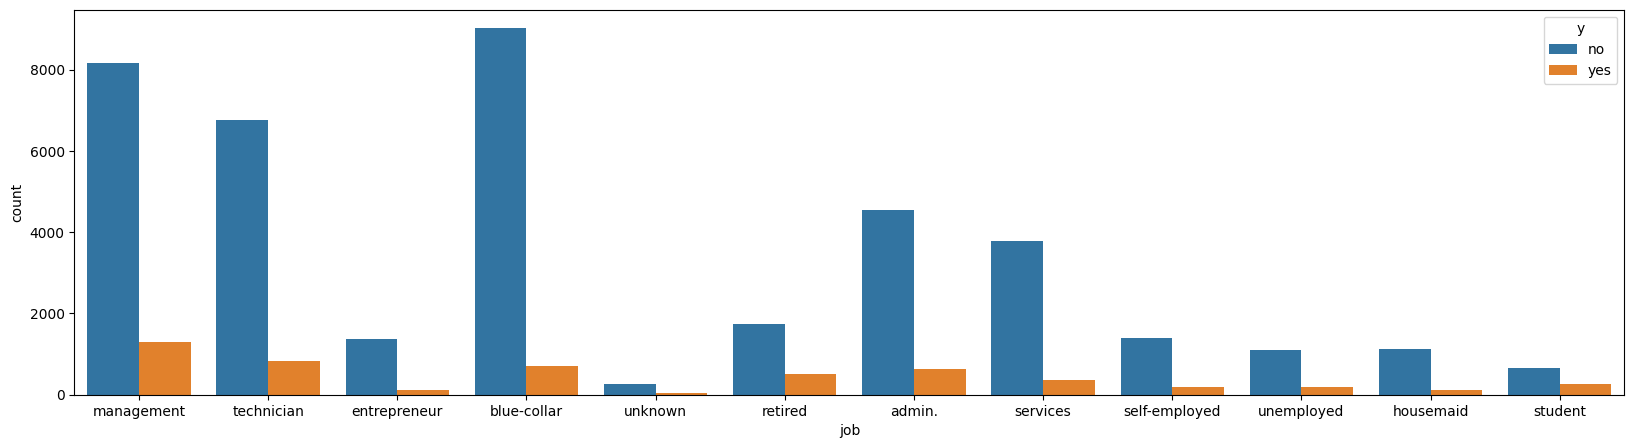

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(x='job', hue='y', data=df)


([<matplotlib.patches.Wedge at 0x12a214db860>,
 [Text(-1.0265439750694143, 0.39523090371159714, 'no'),
  Text(1.0265439153911966, -0.39523105871542047, 'yes')],
 [Text(-0.5599330773105896, 0.2155804929335984, '88.3%'),
  Text(0.5599330447588344, -0.2155805774811384, '11.7%')])

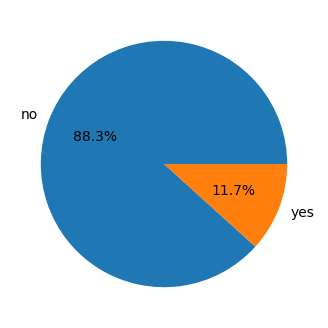

In [15]:
plt.figure(figsize=(6, 4))
y_counts = df['y'].value_counts()
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%')

<Axes: xlabel='housing', ylabel='count'>

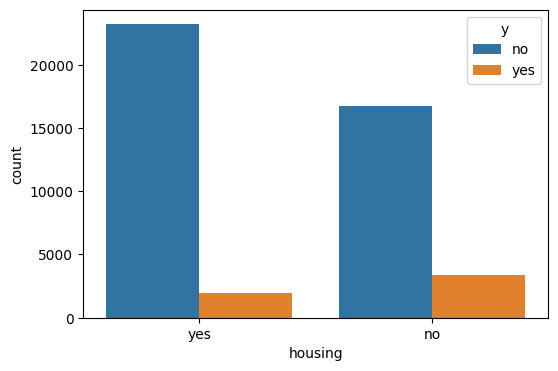

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='housing', hue='y', data=df)

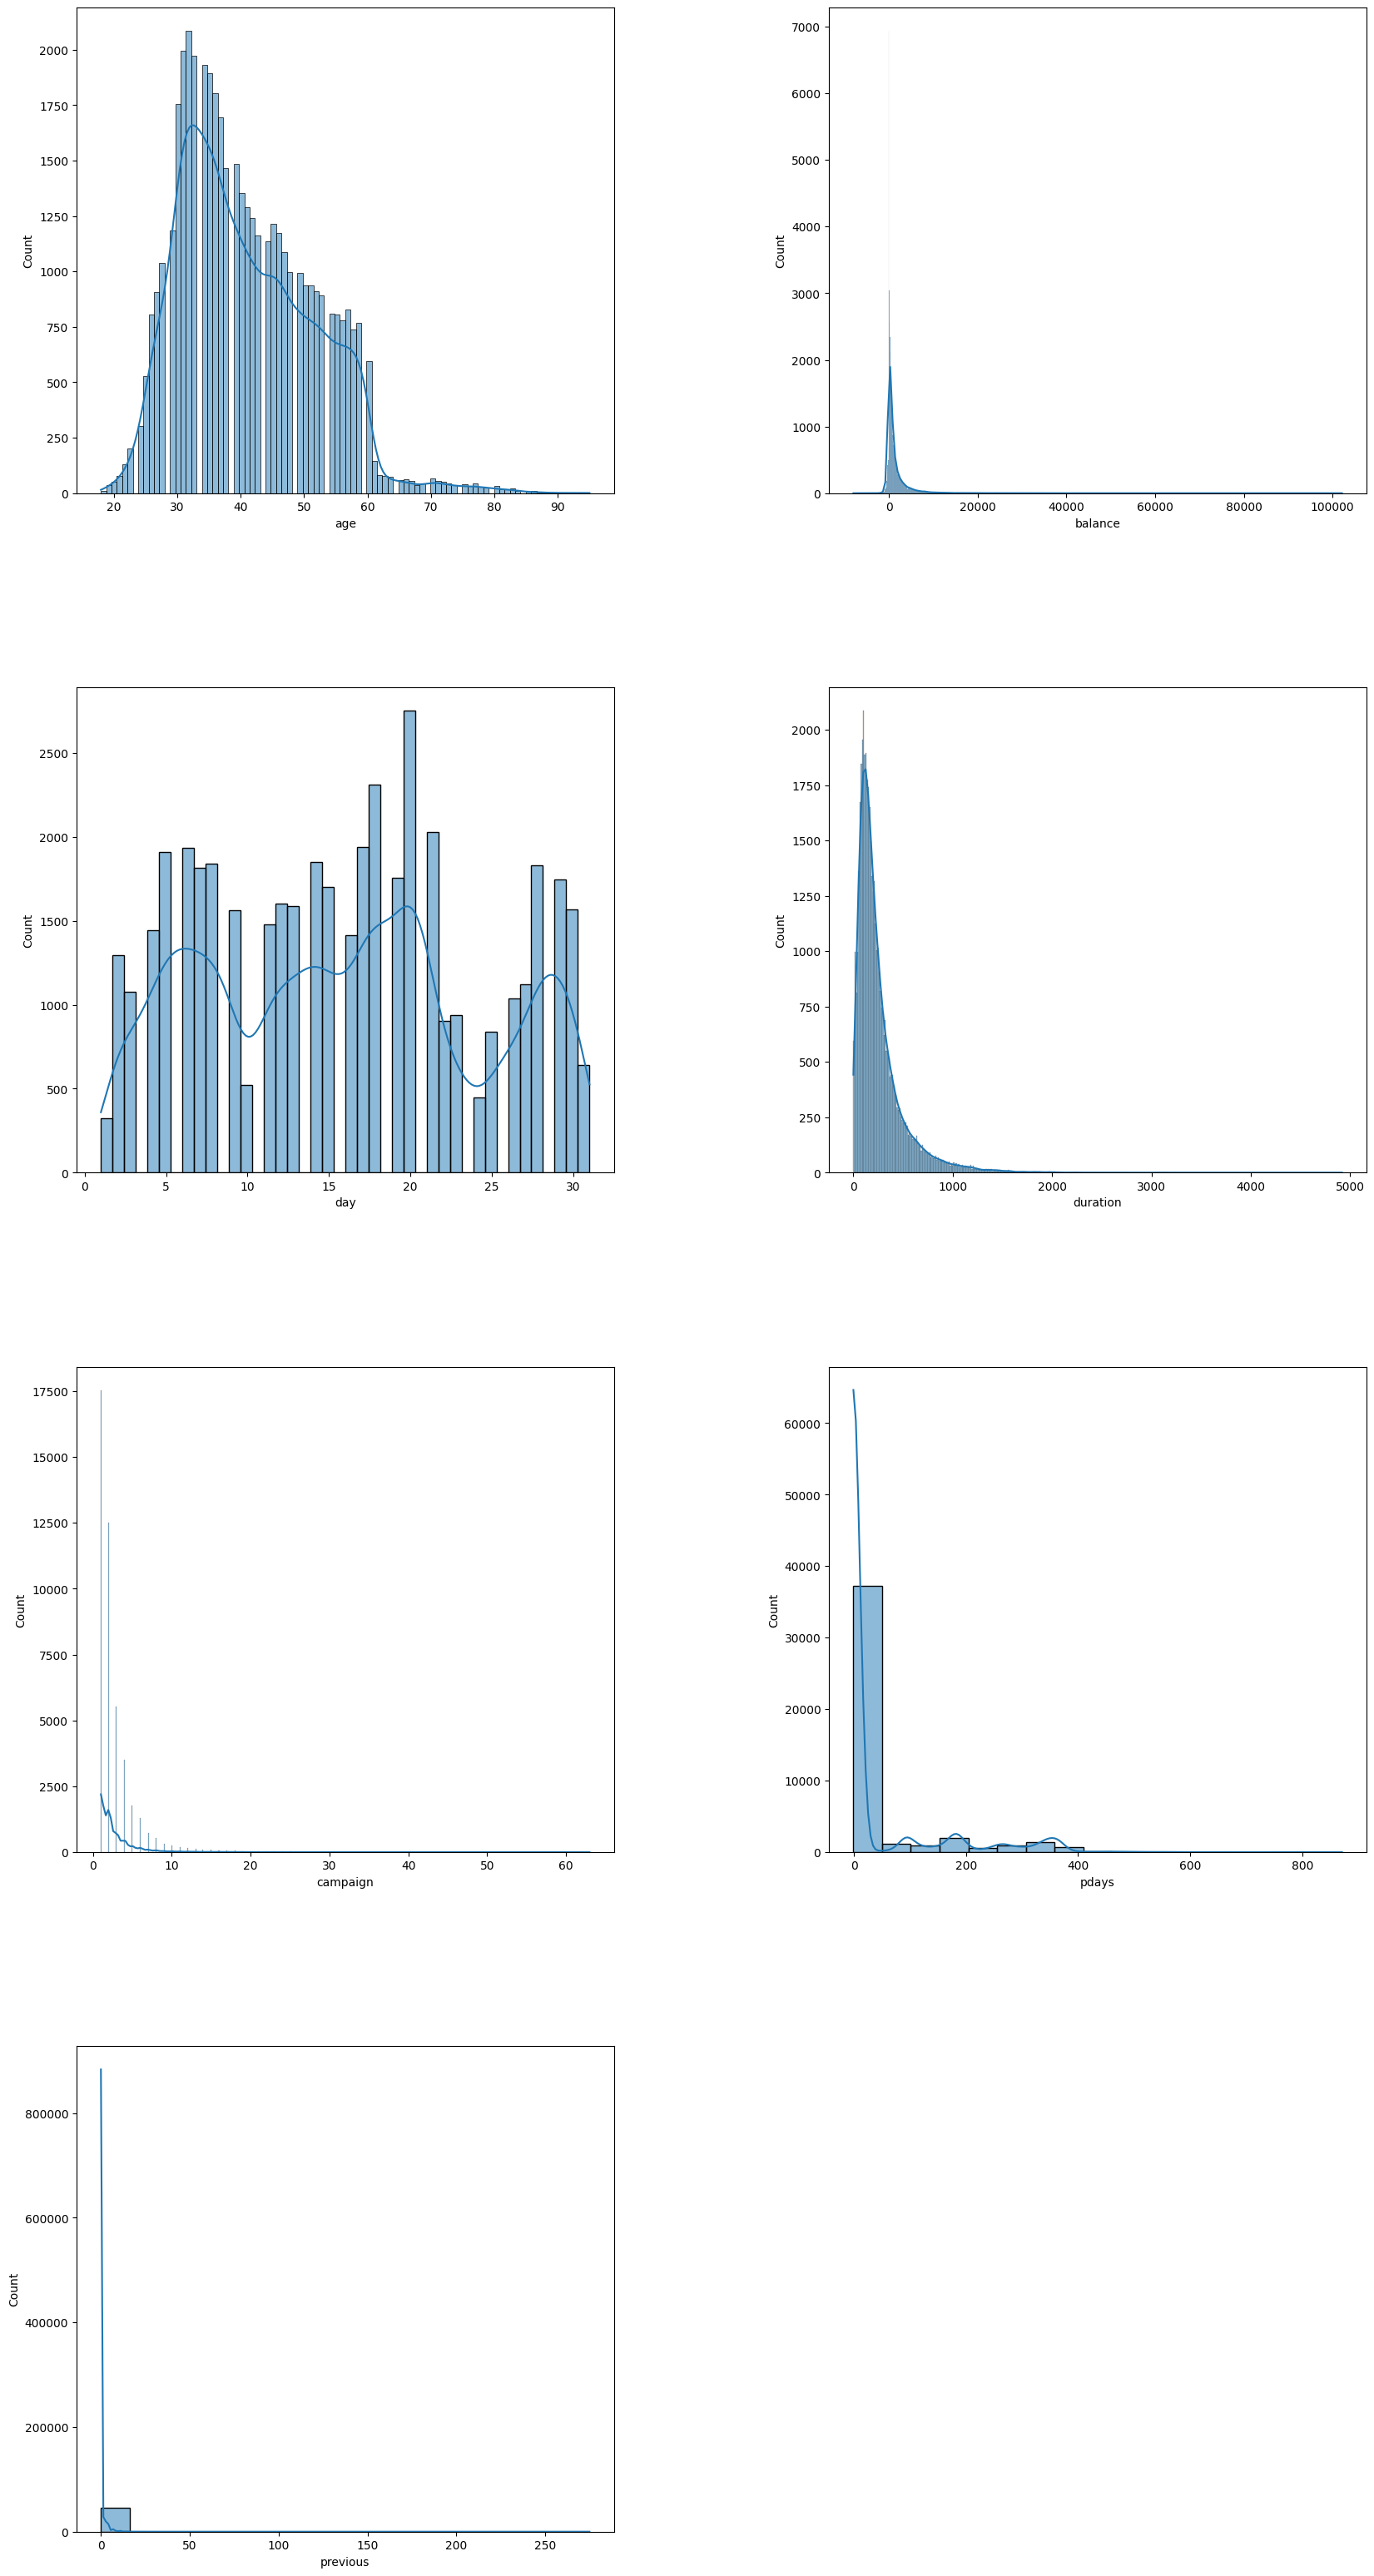

In [17]:
columns = ['age','balance', 'day', 'duration','campaign','pdays','previous']
plt.figure(figsize = (20,50))

for i,column in enumerate(columns):
    plt.subplot(5,2,i+1)
    sns.histplot(x=df[column], kde = True)
    

plt.subplots_adjust(wspace=0.4 , hspace=0.4)
plt.show()

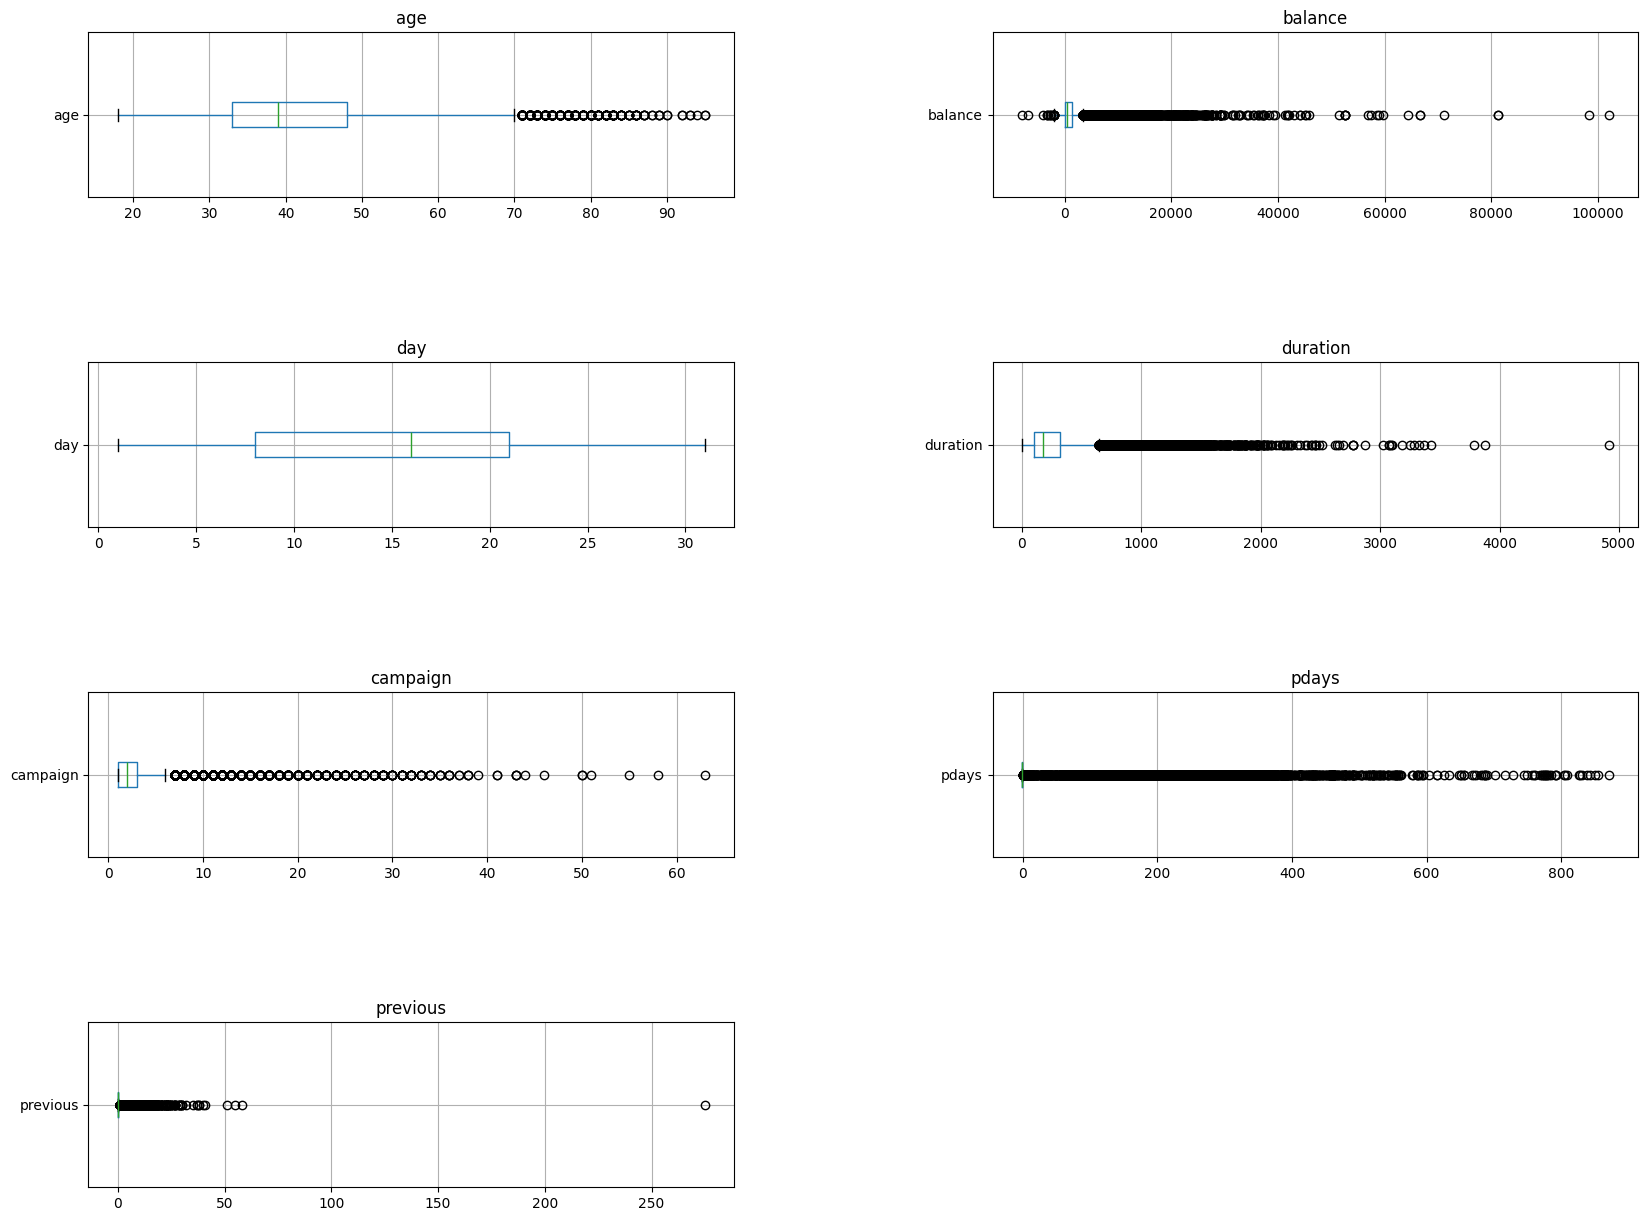

In [18]:
columns = ['age','balance', 'day', 'duration','campaign','pdays','previous']
plt.figure(figsize=(20, 15))

for i,column in enumerate(columns):
    plt.subplot(4,2 , i + 1)
    df.boxplot(column=column, vert=False)
    plt.title(f'{column}')
    
plt.subplots_adjust(wspace=0.4 , hspace=1)
plt.show()

In [19]:
columns = ['balance', 'duration','campaign']

for column in columns:
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f' {column} lower bound is {lower_bound}')

 balance lower bound is -1962.0
 duration lower bound is -221.0
 campaign lower bound is -2.0


In [20]:
#removing outliers
cleaned_df = df[(df['balance'] >=-1962.0) &(df['balance'] <= 60000) & (df['duration'] <= 3500) & (df['campaign'] <= 50) & (df['previous'] <= 50)]
cleaned_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [21]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month', 'y']
label_encoders = {}
for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    cleaned_df.loc[:, column] = label_encoders[column].fit_transform(cleaned_df[column])

In [22]:
# Calculate the correlation matrix

corr_matrix = cleaned_df.corr()
print(corr_matrix)

                age       job   marital  education   default   balance  \
age        1.000000 -0.021817 -0.403236  -0.107159 -0.018508  0.094334   
job       -0.021817  1.000000  0.062043   0.166832 -0.006682  0.020338   
marital   -0.403236  0.062043  1.000000   0.108912 -0.007219  0.003002   
education -0.107159  0.166832  0.108912   1.000000 -0.011416  0.067684   
default   -0.018508 -0.006682 -0.007219  -0.011416  1.000000 -0.068306   
balance    0.094334  0.020338  0.003002   0.067684 -0.068306  1.000000   
housing   -0.185288 -0.125635 -0.016089  -0.090986 -0.006054 -0.067897   
loan      -0.015685 -0.032930 -0.046798  -0.048704  0.075699 -0.086934   
contact    0.026208 -0.082251 -0.039155  -0.111125  0.015463 -0.028002   
day       -0.008932  0.022757 -0.005295   0.022682  0.008837  0.007696   
month     -0.042222 -0.093009 -0.006970  -0.057191  0.011415  0.023291   
duration  -0.006113  0.003766  0.011857   0.001720 -0.010085  0.022561   
campaign   0.005964  0.005976 -0.00978

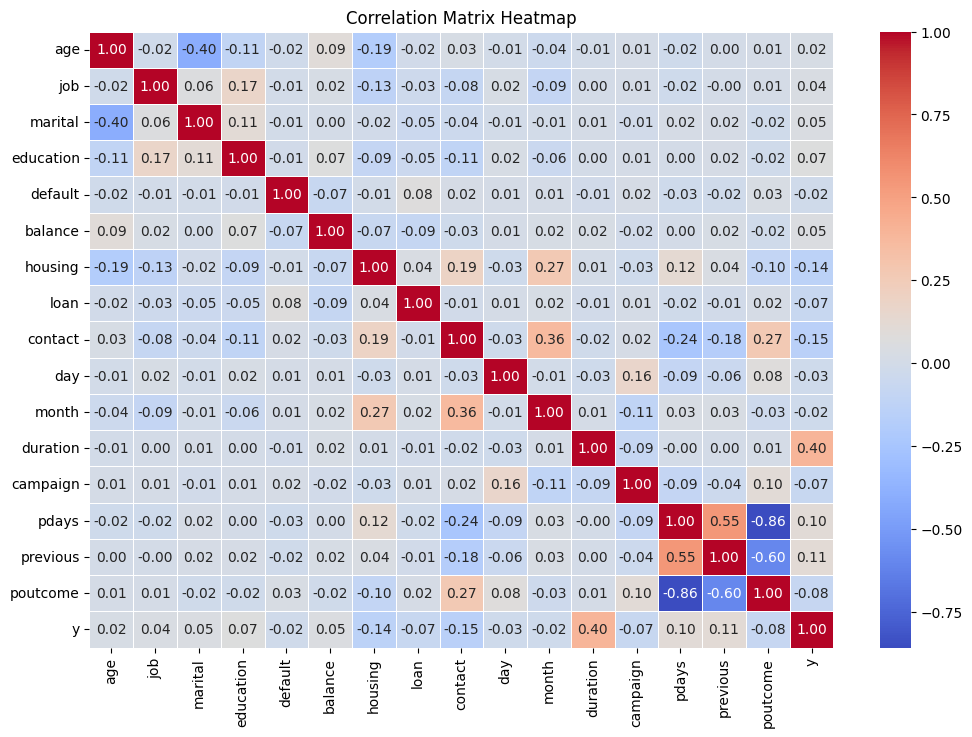

In [23]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [24]:
X = cleaned_df.drop('y',axis = 1)
y = cleaned_df['y']
print(y.unique())
print(y.dtype)
y = y.astype(int)

[0 1]
object


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV
# hyperparameter tuning for entropy and gini impurity
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4, 6, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Parameters: ", grid_search.best_params_)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Best Model: {accuracy:.4f}")

Best Parameters:  {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2}
Accuracy of Best Model: 0.9005


In [27]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features =  None , min_samples_leaf = 6, min_samples_split = 2, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=6,
                       random_state=42)

In [28]:
y_pred = clf.predict(X_test)


Confusion Matrix:
[[11612   392]
 [  957   592]]


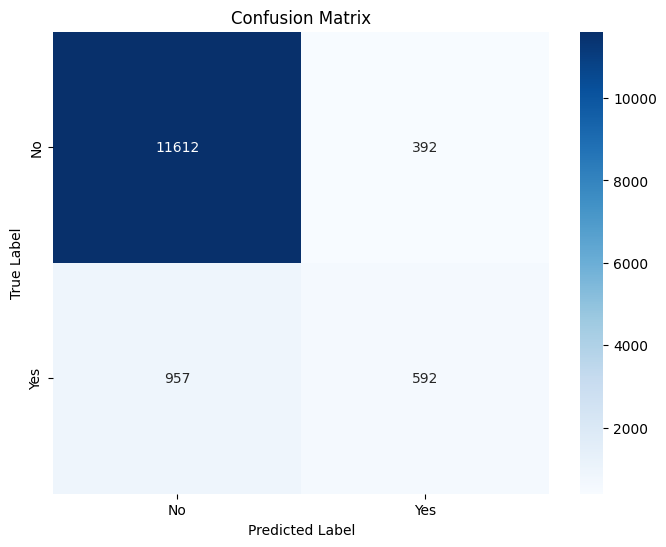

In [29]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


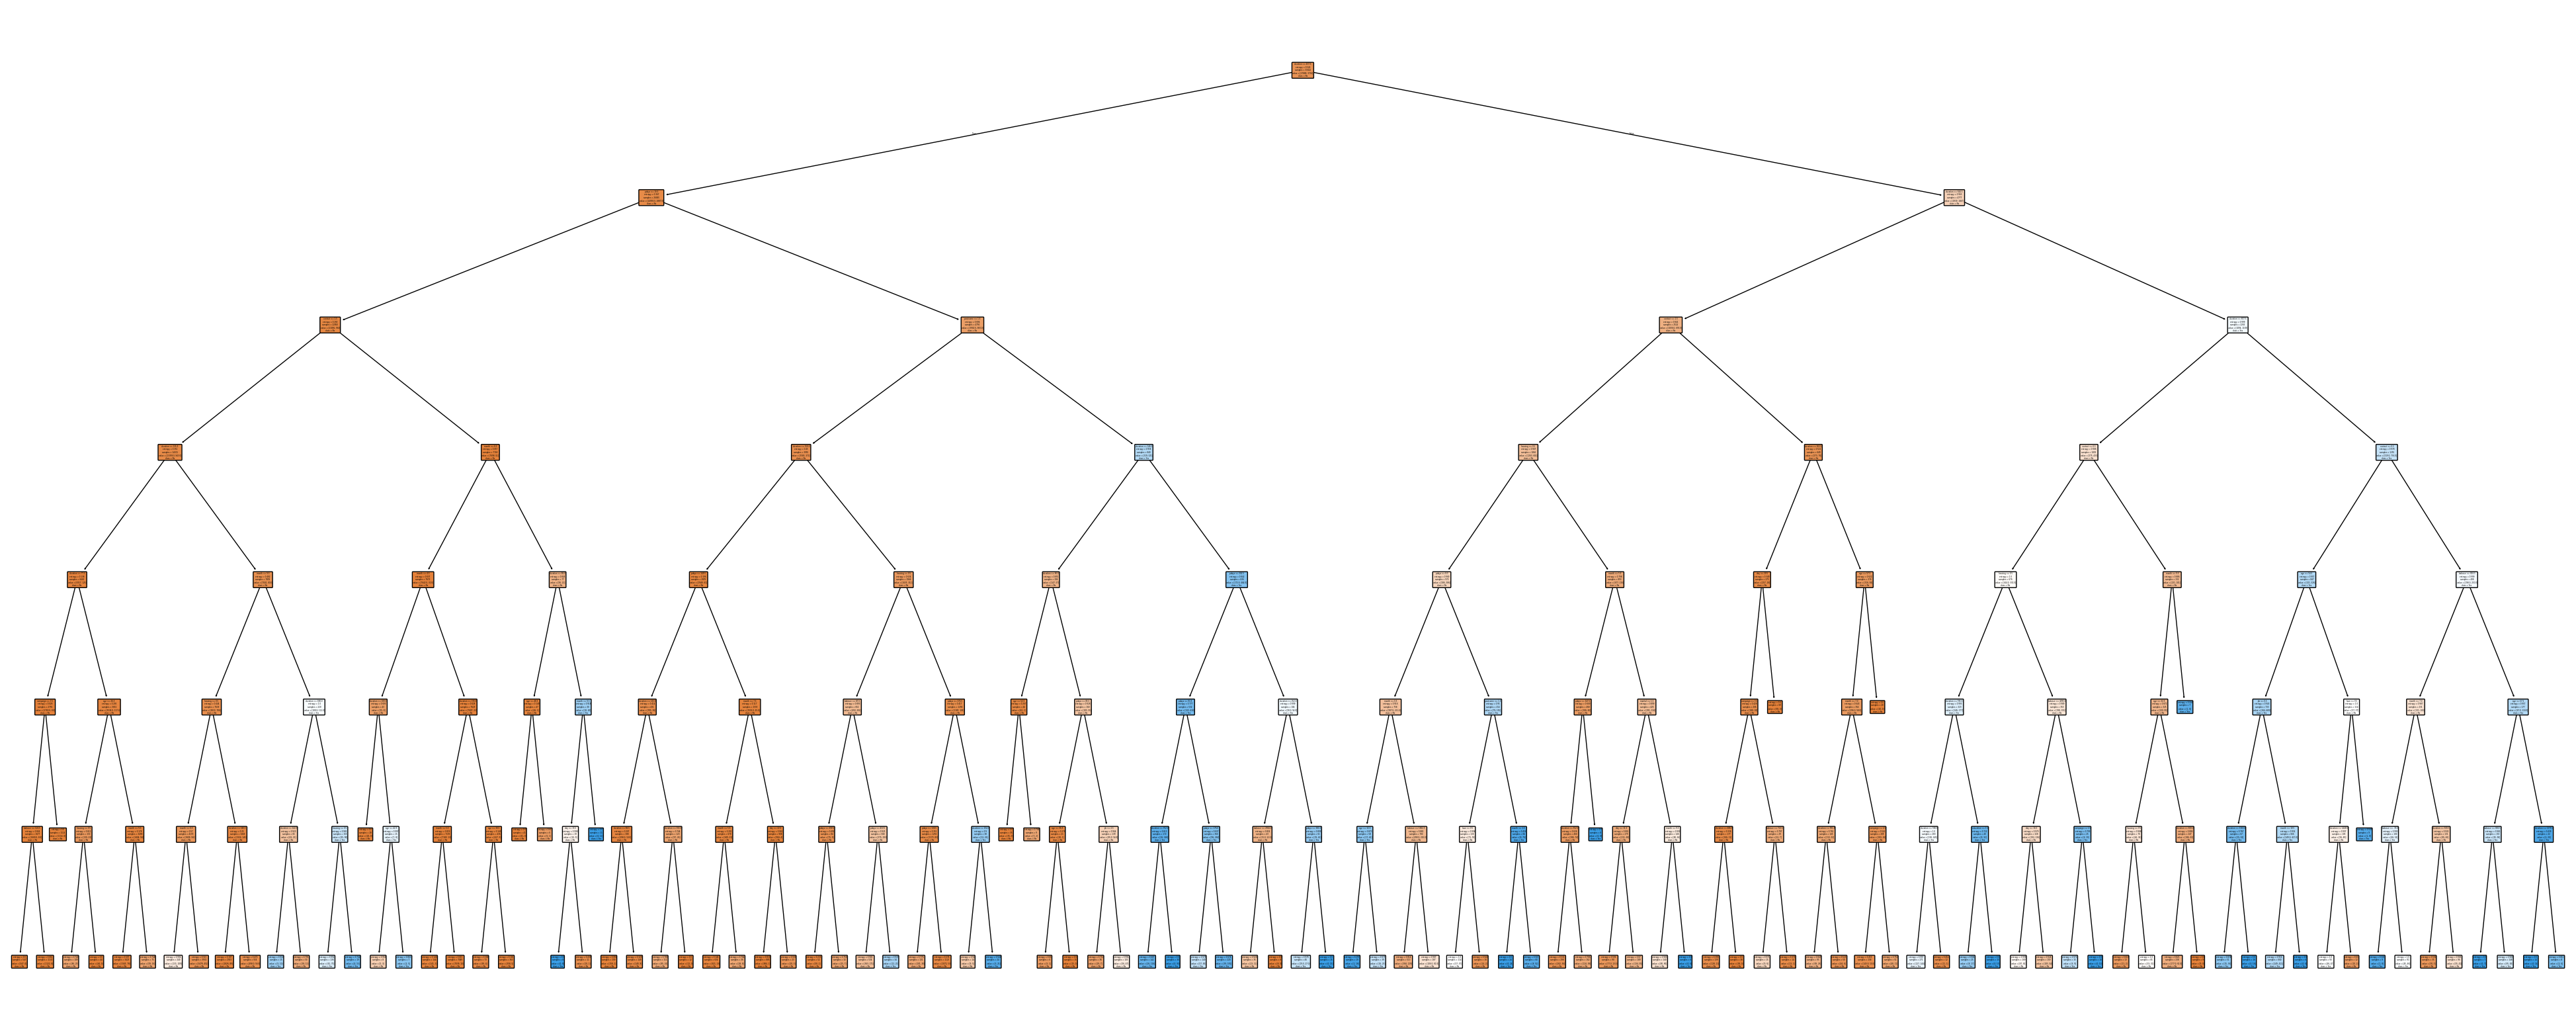

In [30]:
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize=(50,20))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

# Decision tree with GINI Impurity

In [31]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=7, max_features =  None , min_samples_leaf = 10, min_samples_split = 2, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, random_state=42)

In [32]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Best Model: {accuracy:.4f}")

Accuracy of Best Model: 0.9017


Confusion Matrix:
[[11591   413]
 [  919   630]]


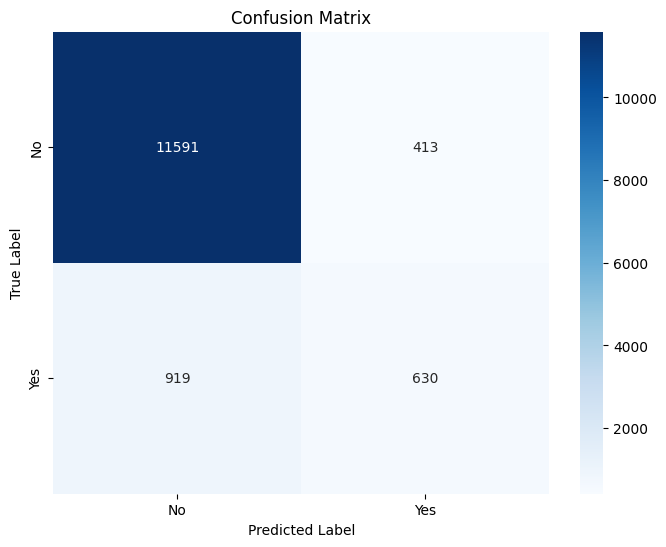

In [33]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



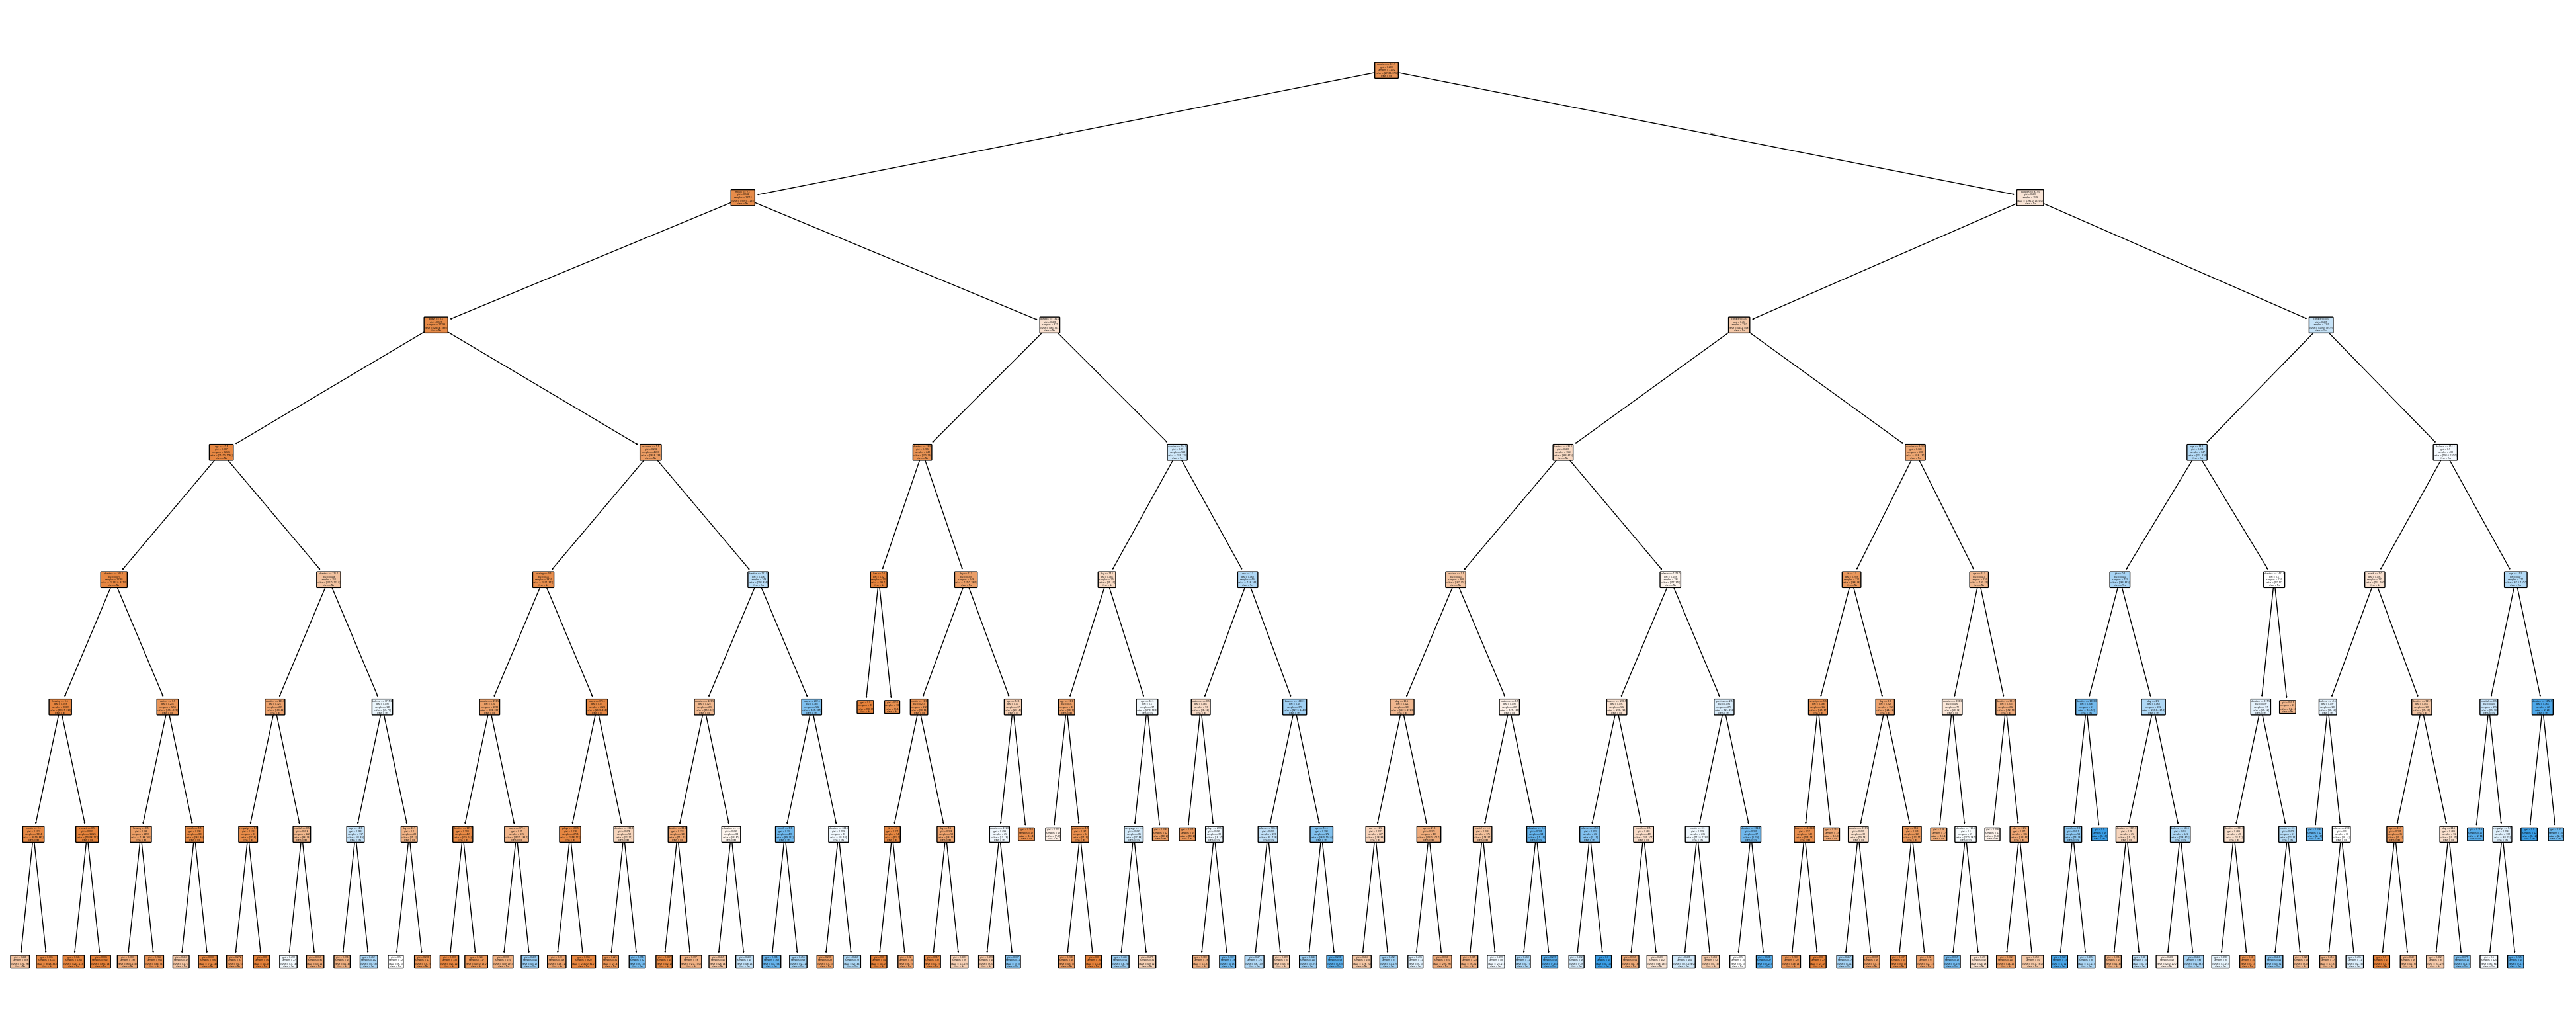

In [34]:
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize=(50,20))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()